Read it carefully (but do not modify the notebook)! You have to:

a. verify that their Null and alternative hypotheses are formulated correctly, and that they are state in both words and formulae (with the proper definitions to accompany the formulae)

b. verify that the data supports the project: i.e. if the a data has the appropriate features (variables) to answer the question, and if the data was properly pre-processed to extract the needed values (there is some flexibility here since the test was not chosen yet)

c. chose an appropriate test to test _H0_ given the type of data, and the question asked.  You can refer to the flowchart of statistical tests for this in the slides, or [here](https://urldefense.proofpoint.com/v2/url?u=https-3A__www.ncbi.nlm.nih.gov_pmc_articles_PMC3116565_&d=DwIBAg&c=slrrB7dE8n7gBJbeO0g-IQ&r=Y_kDTDkI0kFUqfAni6pbYg&m=SxnAbN5my-SA1AiHjeKZFQQfbnlsaPpJgjfXhAfDFFg&s=fISoKQ2Ayt1WMejqJelqaEHVdMEPFDBCLpPWaBiOwhE&e=), or the book Statistics in a Nutshell, or any of the resources that I shared in class.

4. Write  your comments, suggestions, and suggested an appropriate statistical test, motivating your test choice, in a markdown **named CitibikeReview\_\<netID\>.md**. Suggest variations on the question, if you think it may be made more interesting. **Do not perform the test yet.**

6. Submit a pull request to the original repository to share your markdown.

You will be graded on how insightful (and rispectfully delivered) your comments are.


In [3]:
from __future__ import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os
import json

%pylab inline



Populating the interactive namespace from numpy and matplotlib


In [4]:
#download 201503data from citibike
!curl https://s3.amazonaws.com/tripdata/201503-citibike-tripdata.zip > 201503-citibike-tripdata.zip


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 8221k  100 8221k    0     0  15.8M      0 --:--:-- --:--:-- --:--:-- 15.9M


In [5]:
#move the download data to PUI data (folder)
print ("PUIDATA", os.getenv("PUIDATA"))

PUIDATA /nfshome/yc3420/PUIdata


In [6]:
!mv 201503-citibike-tripdata.zip $PUIDATA

In [7]:
!ls $PUIDATA

201503-citibike-tripdata.csv  drinking_water_quaity.csv
201503-citibike-tripdata.zip  time.csv


## Idea: generally, women are more likely to riding longer than man in a single trip during the weekdays
## Null Hypothesis:  the average time of women biking during weekdays is the same or less than man biking 
## Alternative Hypothesis: the average time of women biking during weekdays is higher than man biking 
$H_0$ : ${Wavgtime} <= {Mavgtime}$   

$H_a$ : ${Wavgtime} > {Mavgtime}$  
  
significance level $\alpha=0.05$

In [8]:
os.system("mv " + "201503" + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
#unzip the data
os.system("unzip " + os.getenv("PUIDATA") + "/" + "201503" + "-citibike-tripdata.zip")
ctb = pd.read_csv(os.getenv("PUIDATA") + "/" + "201503" + '-citibike-tripdata.csv')
!ls $PUIDATA


201503-citibike-tripdata.csv  drinking_water_quaity.csv
201503-citibike-tripdata.zip  time.csv


In [9]:
#
ctb['date'] = pd.to_datetime(ctb['starttime'])
ctb.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,669,3/1/2015 0:00,3/1/2015 0:11,164,E 47 St & 2 Ave,40.753231,-73.970325,477,W 41 St & 8 Ave,40.756405,-73.990026,21409,Subscriber,1987.0,1,2015-03-01 00:00:00
1,750,3/1/2015 0:01,3/1/2015 0:14,258,DeKalb Ave & Vanderbilt Ave,40.689407,-73.968855,436,Hancock St & Bedford Ave,40.682166,-73.953990,19397,Subscriber,1968.0,1,2015-03-01 00:01:00
2,663,3/1/2015 0:01,3/1/2015 0:12,497,E 17 St & Broadway,40.737050,-73.990093,477,W 41 St & 8 Ave,40.756405,-73.990026,20998,Customer,NaN,0,2015-03-01 00:01:00
3,480,3/1/2015 0:02,3/1/2015 0:10,470,W 20 St & 8 Ave,40.743453,-74.000040,491,E 24 St & Park Ave S,40.740964,-73.986022,21565,Subscriber,1983.0,1,2015-03-01 00:02:00
4,1258,3/1/2015 0:02,3/1/2015 0:23,345,W 13 St & 6 Ave,40.736494,-73.997044,473,Rivington St & Chrystie St,40.721101,-73.991925,14693,Subscriber,1970.0,1,2015-03-01 00:02:00


In [10]:
ctb.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender', u'date'],
      dtype='object')

In [11]:
ctb.drop([ 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year'], axis=1, inplace=True)

In [12]:
ctb.head()

,tripduration,gender,date
0,669,1,2015-03-01 00:00:00
1,750,1,2015-03-01 00:01:00
2,663,0,2015-03-01 00:01:00
3,480,1,2015-03-01 00:02:00
4,1258,1,2015-03-01 00:02:00
5,363,1,2015-03-01 00:03:00
6,187,1,2015-03-01 00:04:00
7,501,2,2015-03-01 00:04:00
8,606,2,2015-03-01 00:05:00
9,1488,1,2015-03-01 00:05:00


### Figure 1a. Distribution of single ride time length by gender in March 2015, absolute values

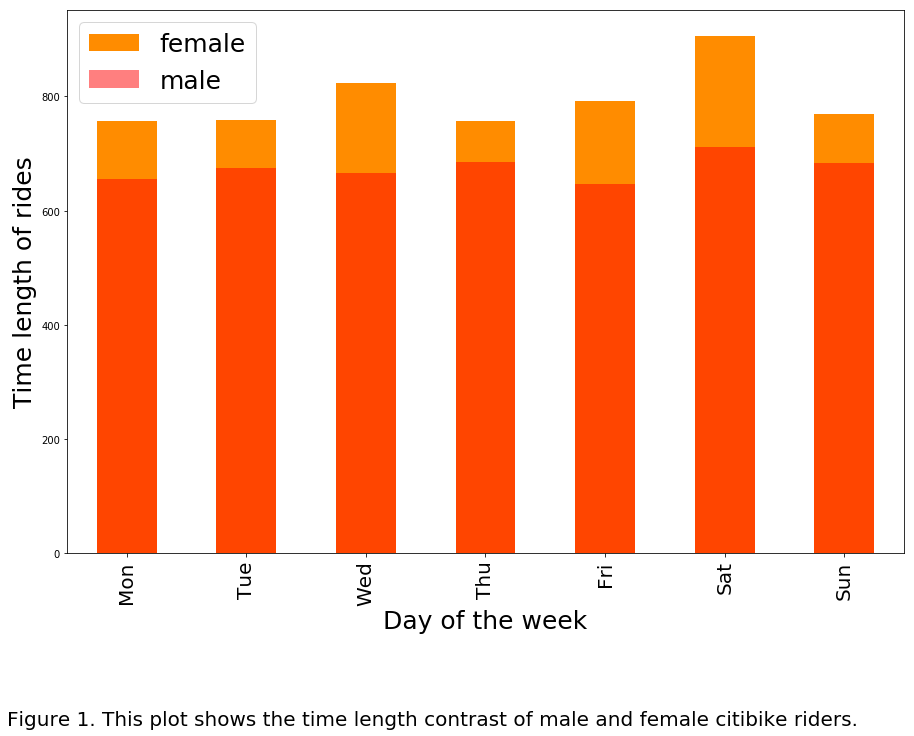

In [16]:
#Distribution of citibike users by gender in March 2015, absolute values
#gender == 1 is male, gender ==2 is female
#separate males with females
fig = pl.figure(figsize(15,10))


norm_w = 1
((ctb['tripduration'][ctb['gender'] == 2].groupby([ctb['date'].dt.weekday]).mean()) / norm_w).plot(kind="bar",color='DarkOrange', label='female')

norm_m = 1
axis = ((ctb['tripduration'][ctb['gender'] == 1].groupby([ctb['date'].dt.weekday]).mean()) / norm_m).plot(kind="bar",color='Red', alpha=0.5,label='male')



tmp = axis.xaxis.set_ticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], fontsize=20)



pl.legend(fontsize = 25)
text1 = 'Figure 1. This plot shows the time length contrast of male and female citibike riders. '
pl.text(-1,-300,text1,fontsize = 20)
pl.xlabel('Day of the week',fontsize = 25)
pl.ylabel('Time length of rides', fontsize = 25)

### Figure 1b. Distribution of single ride time length by gender in March 2015, absolute values, WITH stat errors
#### the distribution in this situation follows a Poisson distribution

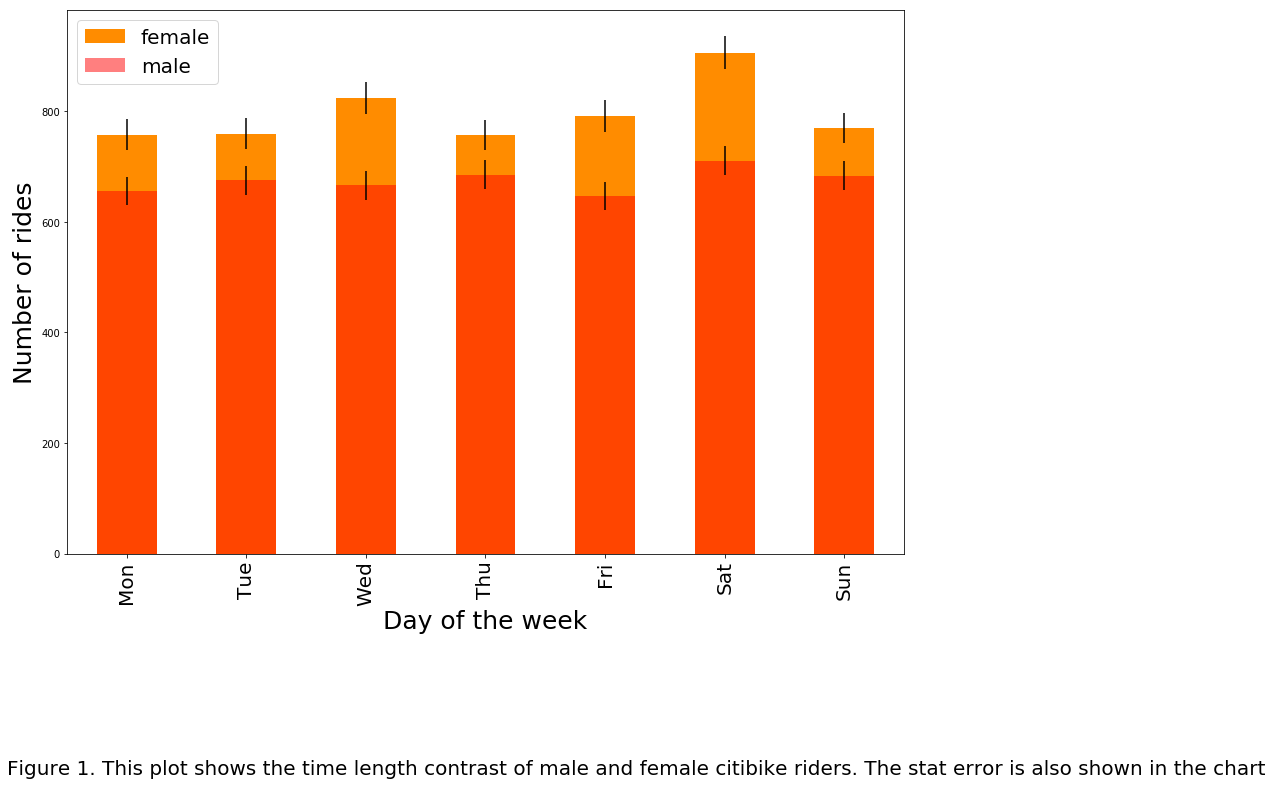

In [17]:
fig=pl.figure(figsize(15,10))


mean_w = ctb['tripduration'][ctb['gender'] == 2].groupby([ctb['date'].dt.weekday]).mean()
norm_w = 1
error_w = np.sqrt(mean_w)
axis=((mean_w) / norm_w).plot(kind="bar",color='DarkOrange',  yerr=[
            ((error_w) / norm_w, (error_w) / norm_w)], label='women bikers')


mean_m = ctb['tripduration'][ctb['gender'] == 1].groupby([ctb['date'].dt.weekday]).mean()
norm_m = 1
error_m=np.sqrt(mean_m)
((mean_m) / norm_m).plot(kind="bar", alpha=0.5, yerr=[((error_m) / norm_m, (error_m) / norm_m)], 
                           color='Red', label='men bikers')


axis.xaxis.set_ticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'], fontsize=20)
axis.set_ylabel ("Number of rides")
axis.set_xlabel ("Day of the week")
pl.legend(['female','male'],fontsize=20)
text2 = 'Figure 1. This plot shows the time length contrast of male and female citibike riders. The stat error is also shown in the chart'
pl.text(-1,-400,text2,fontsize = 20)
pl.xlabel('Day of the week',fontsize = 25)
pl.ylabel('Number of rides', fontsize = 25)

# REVIEW COMMENTS

### 1. The Null and Alternative hypothesis are formulated correctly in both words and formular. It would be better to put ‘avgtime'in the subscript like this
$H_0$ : $W_{avgtime}$ <= $M_{avgtime}$
### and denote that 'W' stands for women, 'M' stands for men. and 'avgtime' stands for average time of riding during the weekdays

### 2. The data supports the project: it has the appropriate variables to answer the question, and was properly pre-processed to extract the needed columns.
### A possible processing of the data would be extract men and women data from the gender columns, which will prepare for the further statistical testing.




### 3. As for the test for this quesiton, since it has two samples data(men's tripduraton data and women's tripudration data). we don't know the population variance. Therefore, t-test can be applied here because it could use the sample variance to caculate.

### 4.The figure gives us a very interesting observation. A validation using other months or years data to test the same question can be considered. Is there a seasonal pattern? or is this parttern only hold for some months or the hold year.